# Exercise 1 (Implementing your own binomial distribution)
To solve this you simply had to define the function to take values either 0 or 1 and and for doing this we will sample a random uniform number and we will ask it if it is larger or not than a given value which correspond to the probability

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
def my_Binomial(p,n=10000):
    a=np.random.random(n)
    result=np.zeros(n)
    result[a>p]=1
    return result

Now we compare our results with the numpy implementation

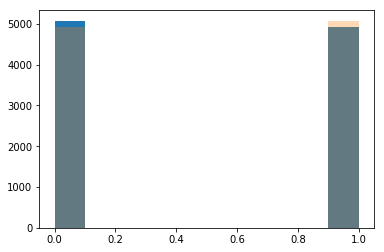

In [2]:
plt.hist(my_Binomial(0.5))
plt.hist(np.random.binomial(1,0.5,10000),alpha=0.3)
plt.show()

# Exercise 2 (Kinetic gas theory)
for this one we first define our functions to fit

In [3]:
def Boltzmann_2D(v,s):
    return s*v*np.exp(-0.5*s*x**2)
def Boltzmann_3D(v,s):
    return (2*s**3/np.pi)**(0.5)*(v**2)*np.exp(-0.5*s*x**2)

we are going to treat first the problem in 3D so we generate the velocities

In [4]:
N=1000000
v_x=np.random.normal(0,1,N)
v_y=np.random.normal(0,1,N)
v_z=np.random.normal(0,1,N)
V=np.sqrt(v_x**2 + v_y**2 + v_z**2)

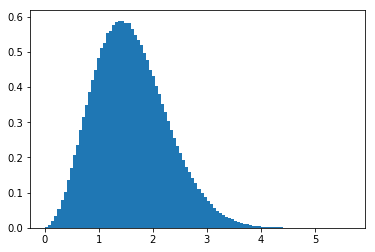

In [5]:
hist,bins,_=plt.hist(V,bins=100,density=True)

Now we prepare our variables to fit the model

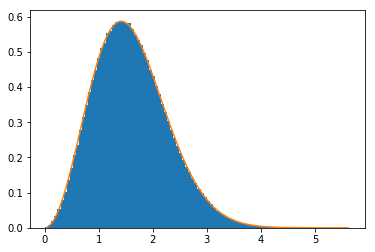

In [6]:
x=(bins[1:]+bins[:-1])*0.5
y=hist
popt,pcov=curve_fit(Boltzmann_3D,x,y)
plt.hist(V,bins=100,density=True)
plt.plot(x,Boltzmann_3D(x,*popt))
plt.show()

We test our fit via the $R^2$

In [7]:
R_2= 1- np.var(y-Boltzmann_3D(x,*popt))/np.var(y)
print("our R^2 was {}".format(R_2))

our R^2 was 0.9999290435674691


We compute the value of speed with higher value

In [8]:
bins[np.argmax(y)]

1.4176433042271166

In [9]:
np.sqrt(2/popt[0])

1.4147947491097372

And the mean speed

In [10]:
np.mean(V)

1.5963950629476023

In [11]:
2/np.sqrt(np.pi) * np.sqrt(2/popt[0])

1.59642492061155

We can also compute the integral and see that this is equivalent to only take the mean

In [12]:
np.trapz(x*y,x)

1.5964009890039574

# Exercise 3 (Poisson limit)
for this point we are going to test with different values of $n$ and $p$

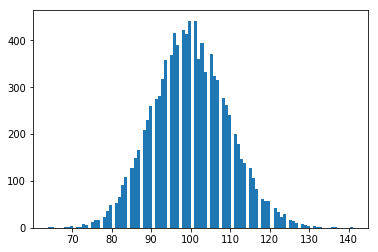

In [13]:
n,p=1000,0.1
plt.hist(np.random.binomial(n=n,p=p,size=10000),bins=100);

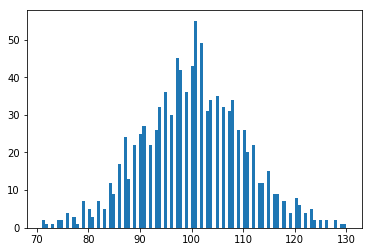

In [14]:
plt.hist(np.random.poisson(n*p,1000),bins=100);

In [15]:
n=np.logspace(3,9,10)
p=np.logspace(-5,-1,10)

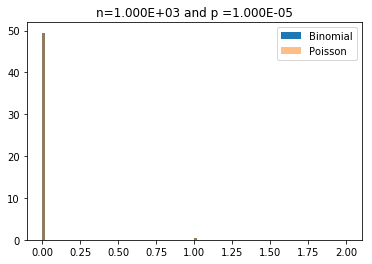

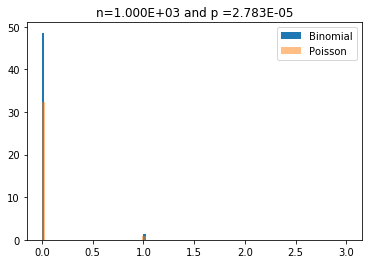

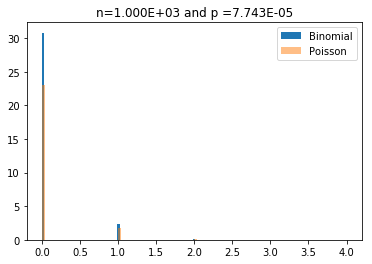

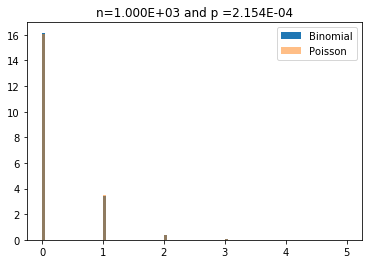

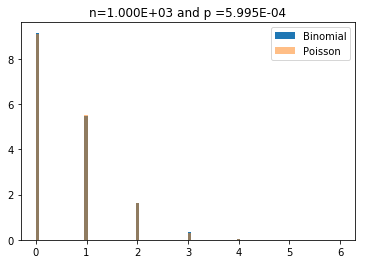

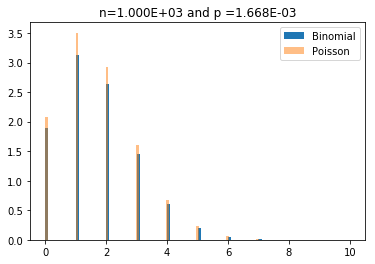

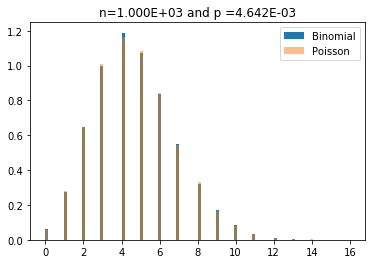

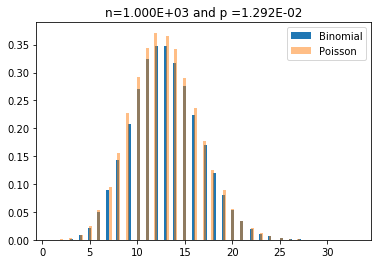

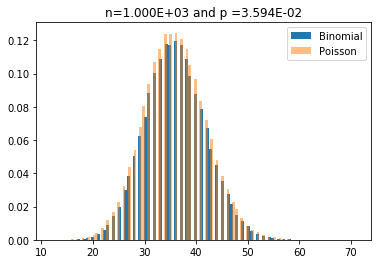

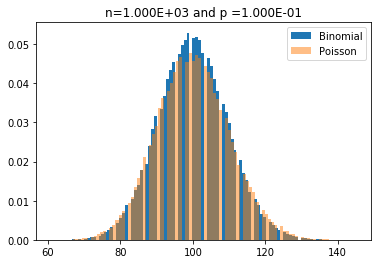

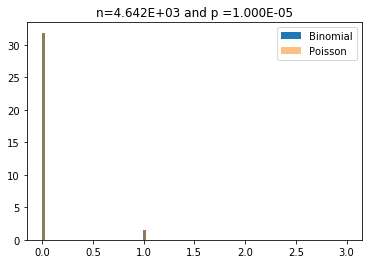

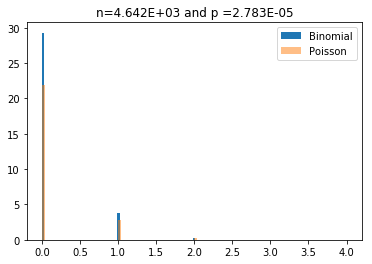

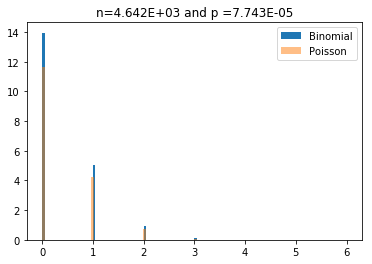

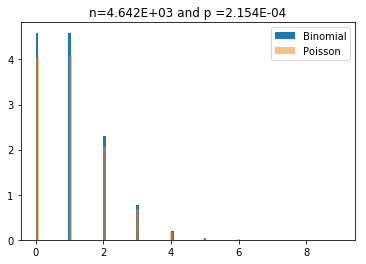

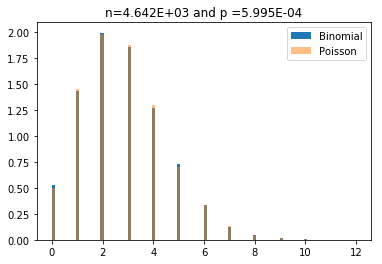

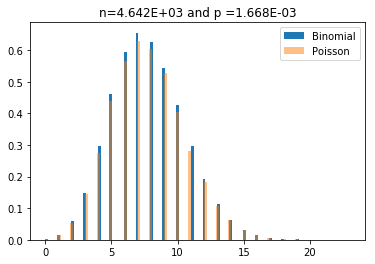

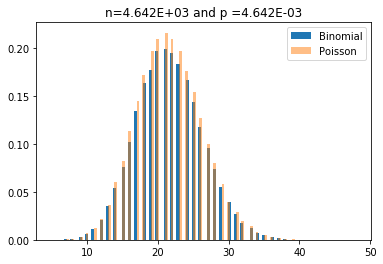

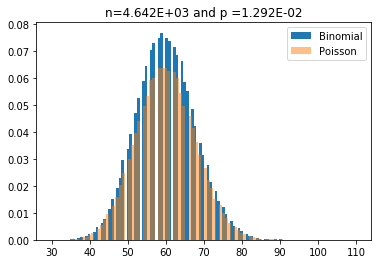

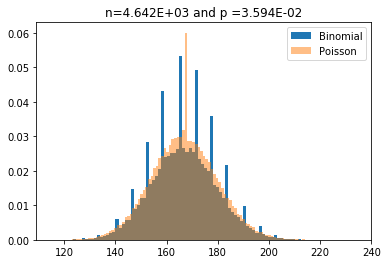

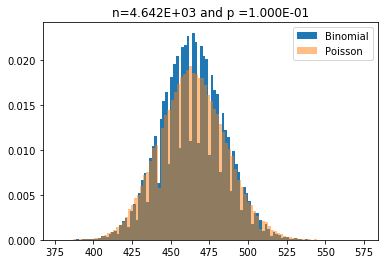

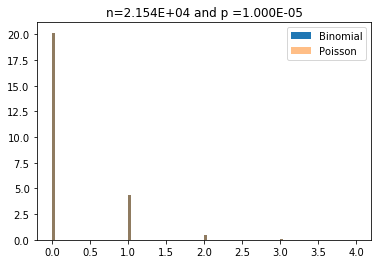

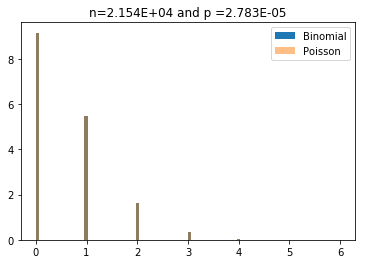

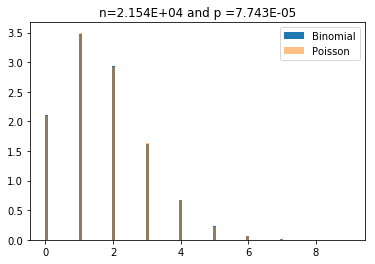

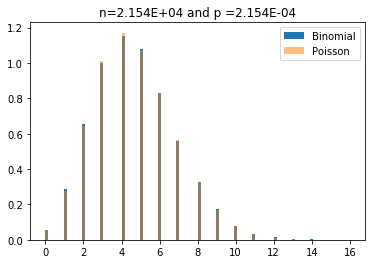

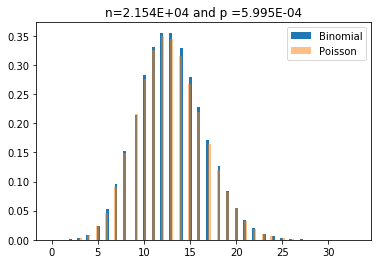

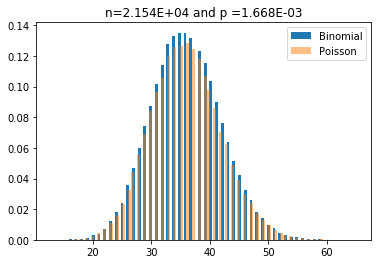

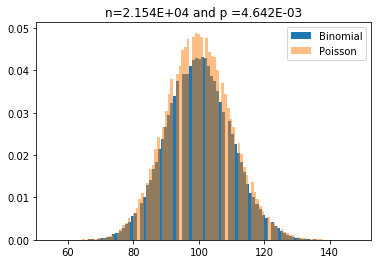

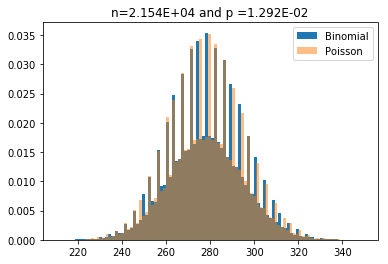

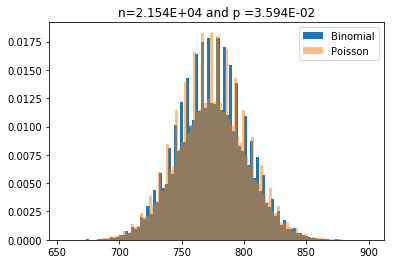

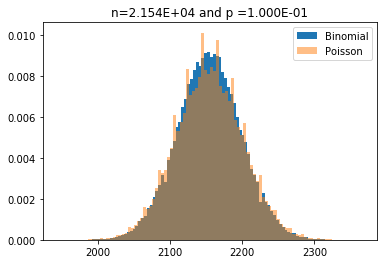

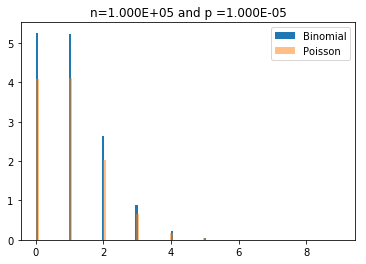

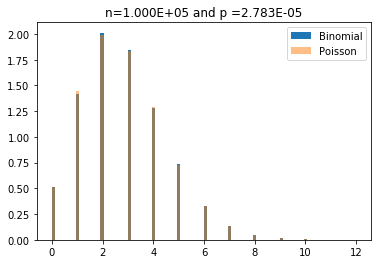

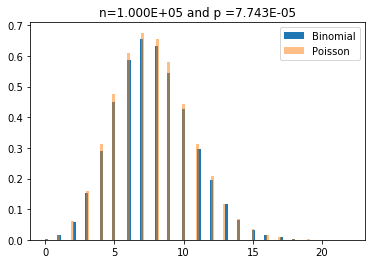

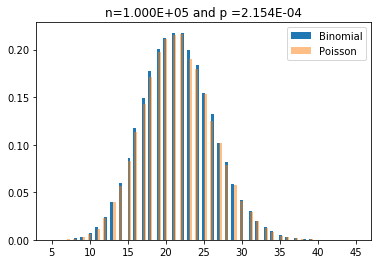

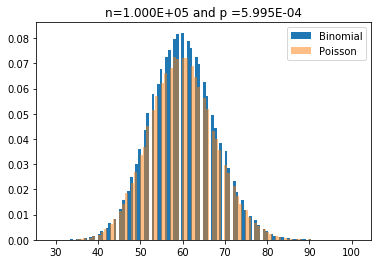

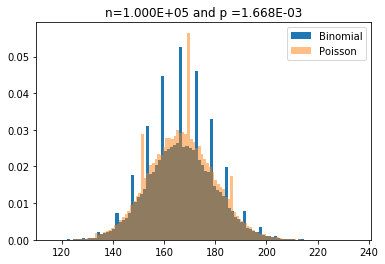

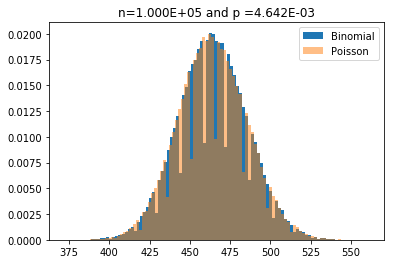

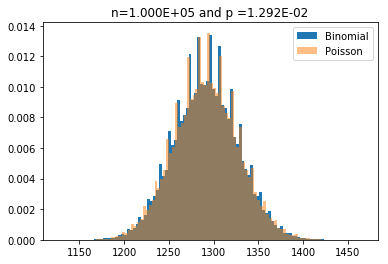

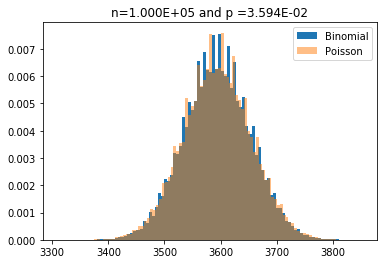

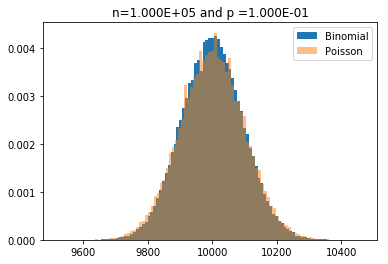

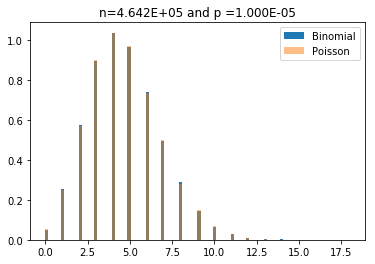

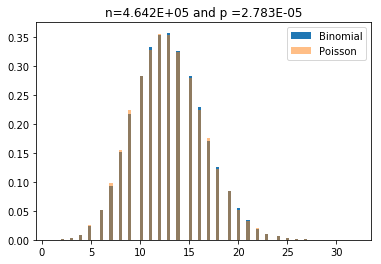

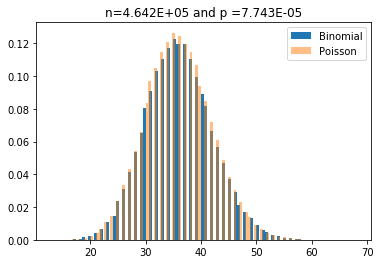

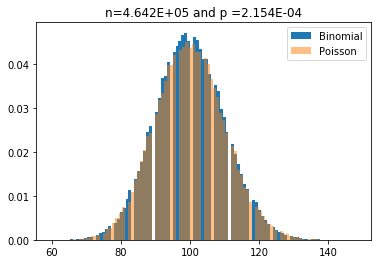

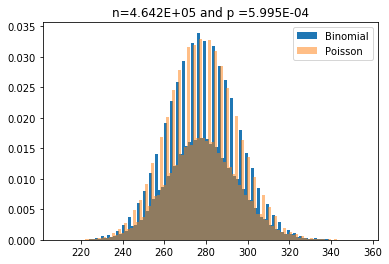

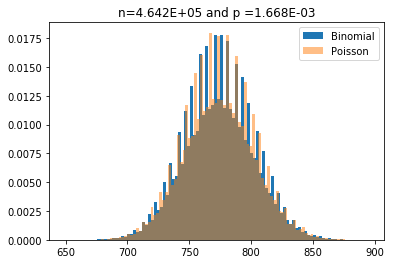

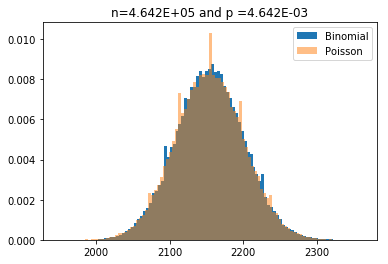

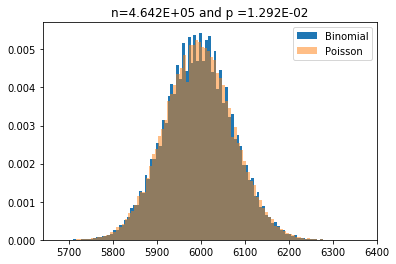

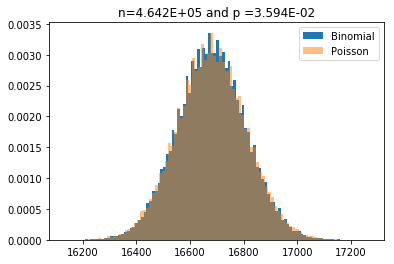

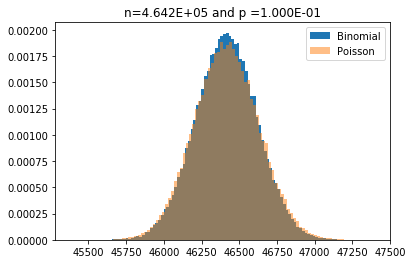

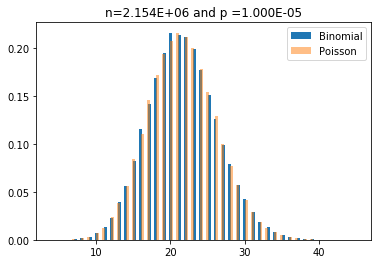

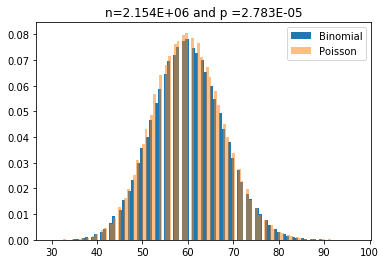

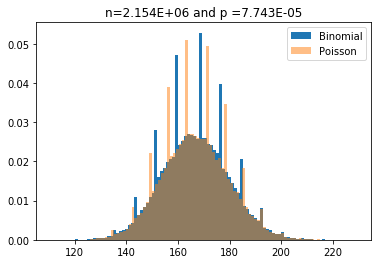

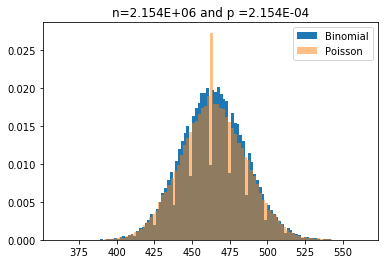

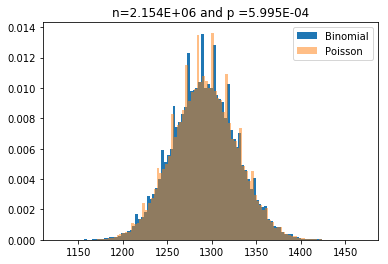

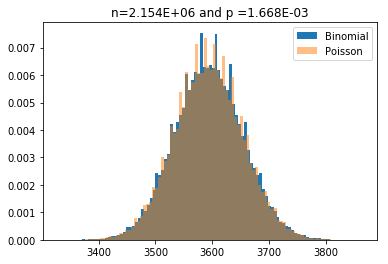

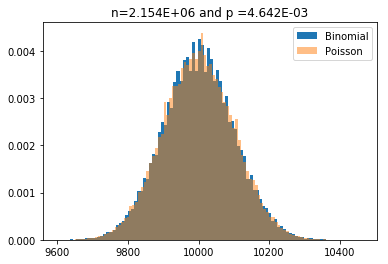

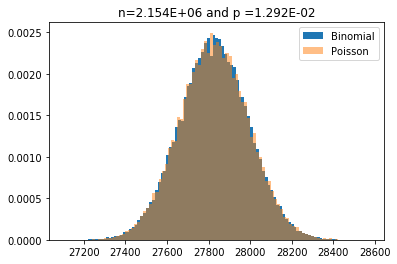

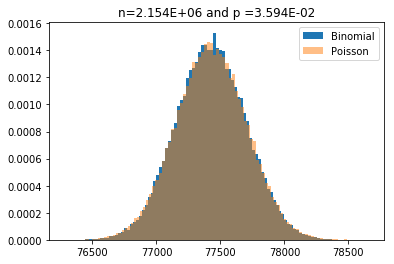

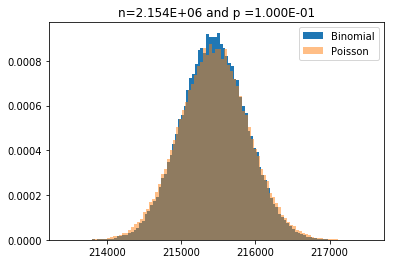

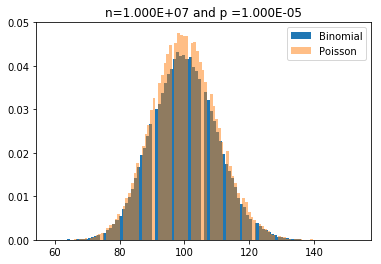

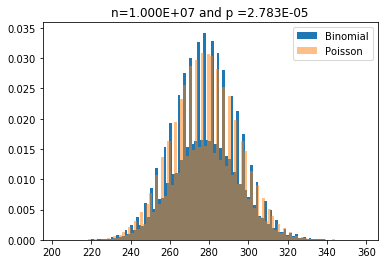

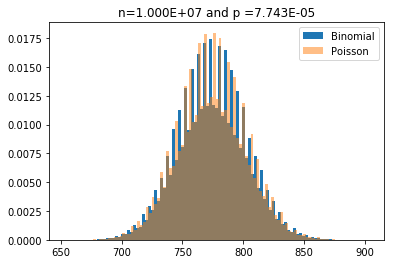

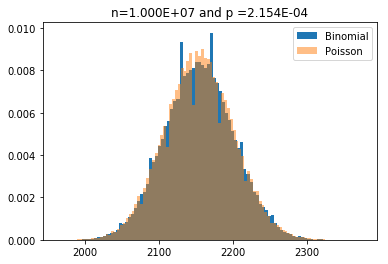

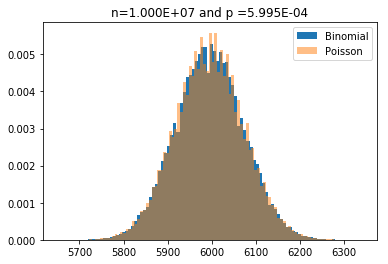

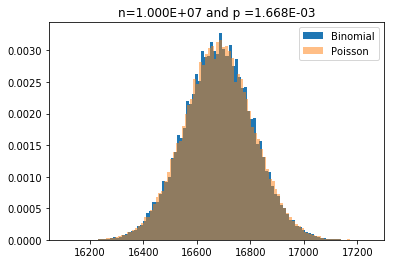

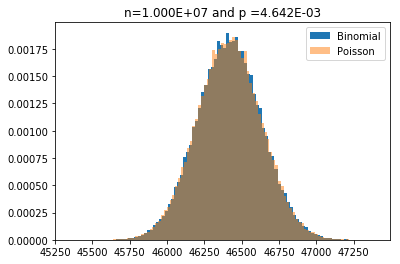

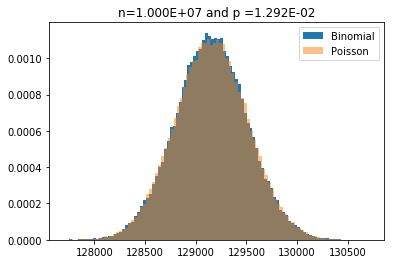

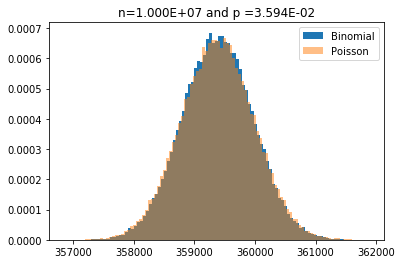

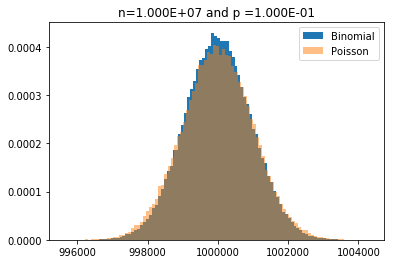

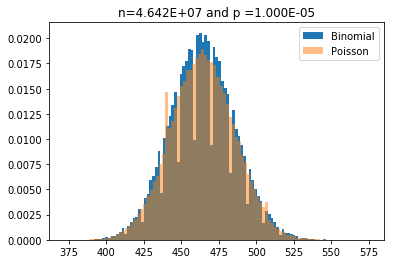

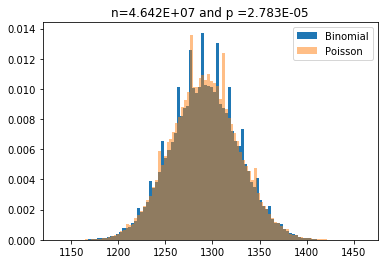

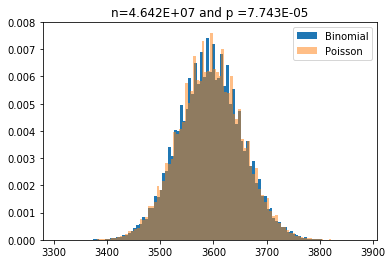

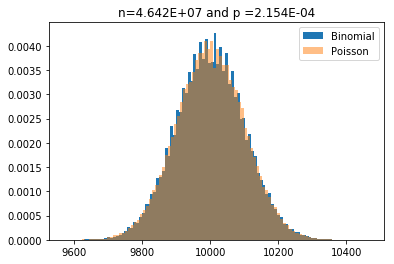

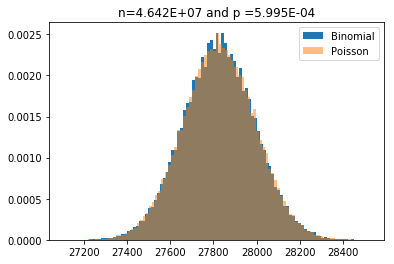

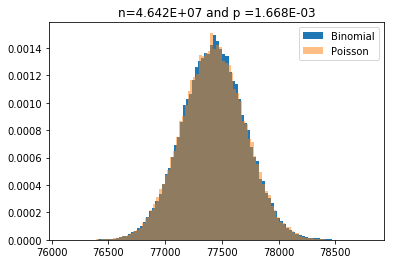

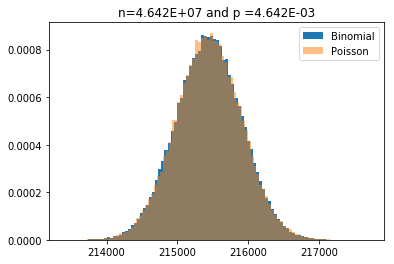

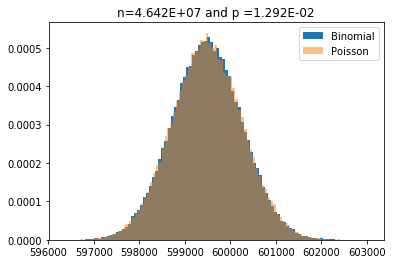

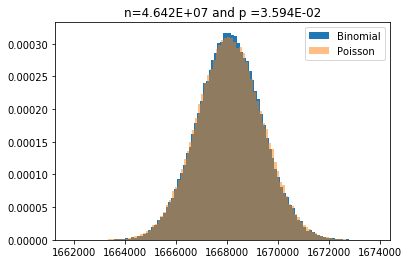

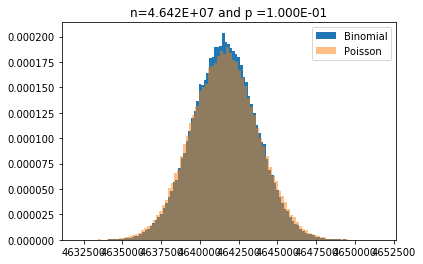

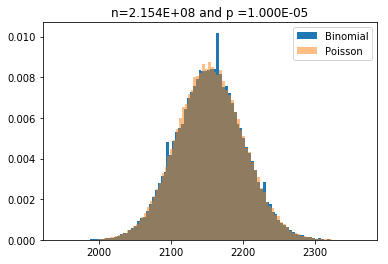

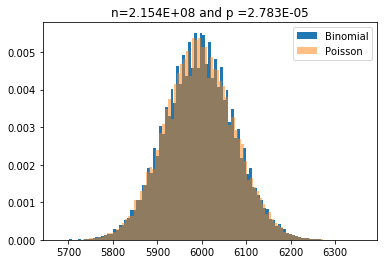

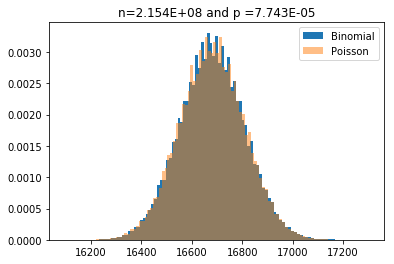

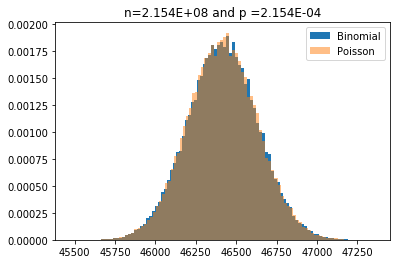

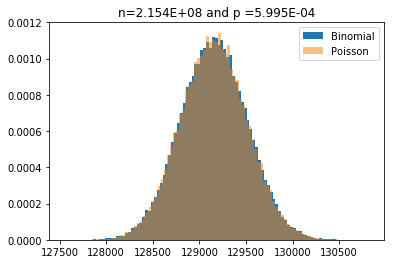

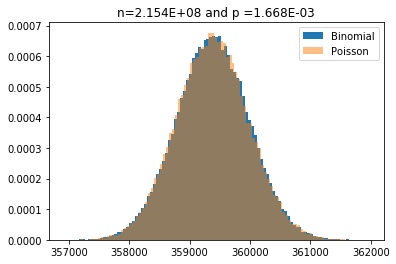

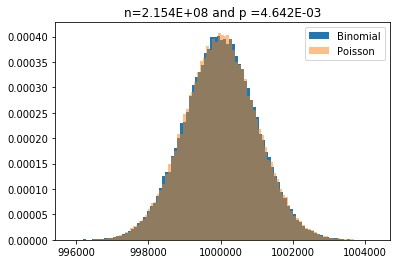

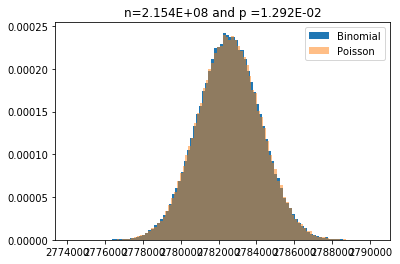

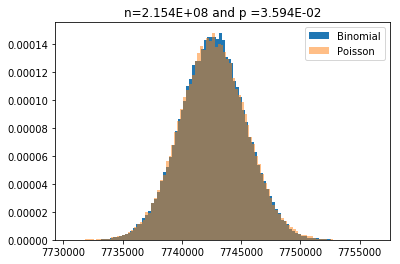

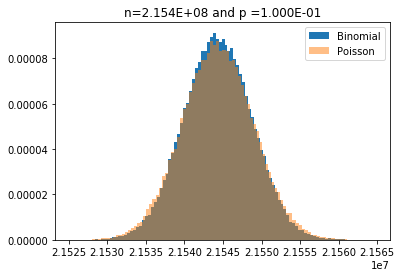

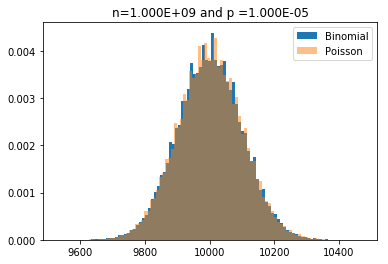

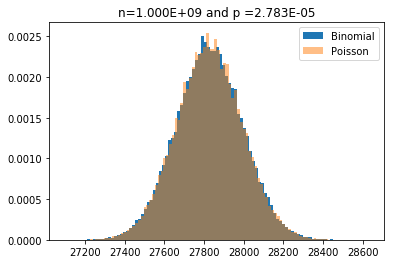

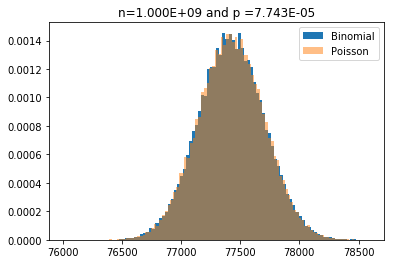

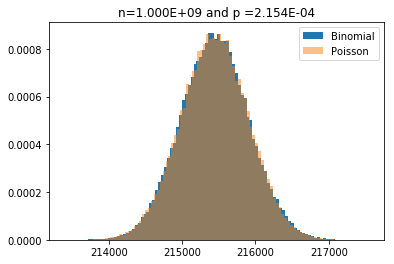

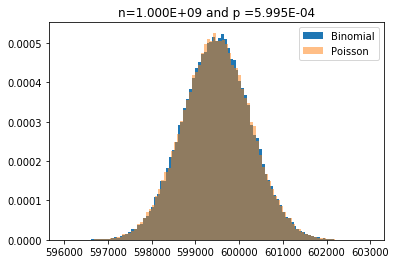

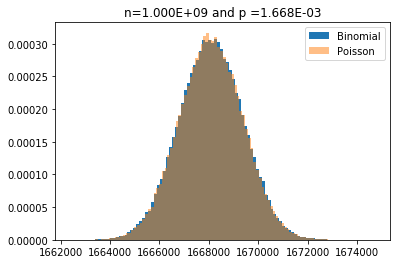

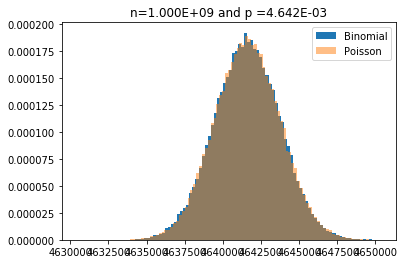

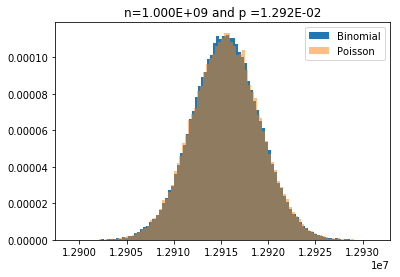

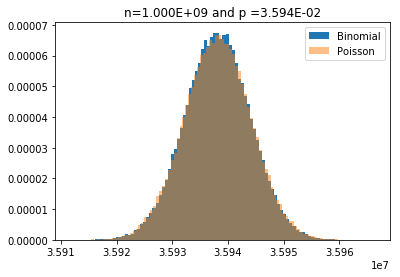

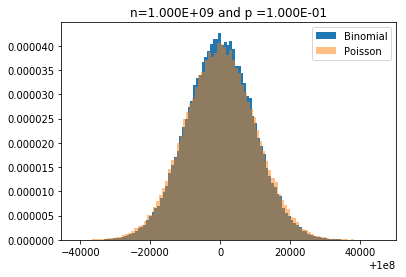

In [16]:
for i in n:
    for j in p:
        plt.title("n={:.3E} and p ={:.3E}".format(i,j))
        plt.hist(np.random.binomial(n=i,p=j,size=100000),bins=100,label="Binomial",density=True)
        plt.hist(np.random.poisson(j*i,100000),bins=100,alpha=0.5,label="Poisson",density=True)
        plt.legend()
        plt.show()

So the last set of figures shows how this theorems holds and how we can approximate a distribution using other one

# Exercise 4
To solve this the only thing you have to know is that the variable takes values similar that the range function does

In [17]:
def Expected(px):
    x=range(len(px))
    result=np.sum(np.array(x)**2 *px)
    return result

In [18]:
def test1():
    px = np.array([ 0.01720472,  0.23565573,  0.7425048 ,  0.68060143,  0.25665851])
    res = 13.437623957331406
    ans = Expected(px)
    return (abs(res-ans) < 0.00001)
test1()

True

# Exercise 5 (Try something harder)
This one was a little bit harder but still easy, the only thing you had to think about is the expected value of the loss, remember that the player loss only if all tosses were tails. Therefore the last part can be translated with the relation to the Binomial distribution as $(1-p)^5$, where $p$ is the probability to win ( have a head). Therefore the expected loss is $B(1-p)^5$, by other hand the expected value of wining will be $5p$ [hint: check the expected value of a binomial variable](https://en.wikipedia.org/wiki/Binomial_distribution), so as we are interested in the situation where is not disfavorable for the player, we need to set the condition of have both expected values equal

$$
B(1-p)^5=5p
$$
and therefore
$$
B=\frac{5p}{(1-p)^5}
$$
so our function will return this

In [19]:
def p2(p):
    return 5*p/(1-p)**5

In [20]:
def test2():
    p0 = 0.7
    res = 1440.3292181069949
    ans = p2(p0)
    return (abs(res-ans) < 0.001)
test2()

True